In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [7]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


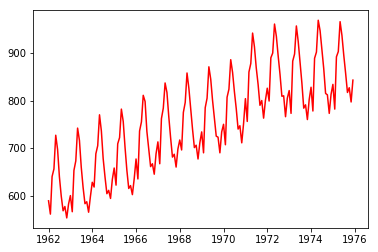

In [62]:
plt.plot (milk['milk'],c='r')
plt.show()

In [71]:
import statsmodels.api as sm
result = sm.tsa.stattools.adfuller(milk['milk'].ravel())
round(result[1],2)

0.63

In [56]:
dim=milk.index.days_in_month

In [58]:
milk['milk_per_day']=milk['milk']/dim

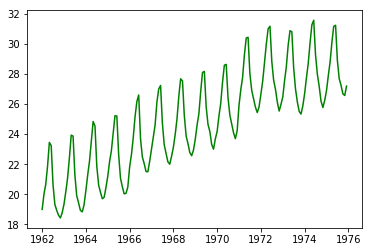

In [63]:
plt.plot (milk['milk_per_day'],c='g')
plt.show()

In [65]:
round(milk.milk_per_day.sum(),2)

4166.33